### Enfoque analítico
Después de realizar un análisis previo de los requerimientos del negocio, se definió el siguiente enfoque analítico para el problema actual:

- Tipo de aprendizaje: Supervisado
- Tarea de aprendizaje: Regresion
- Técnica de aprendizaje: Regresion lineal

Se decidió usar este enfoque debido a que el negocio desea saber que viviendas permiten mascotas basado en las características de estas. Por lo tanto, el negocio ya tiene información previa de varias viviendas que admiten y no admiten mascotas, es decir ya tiene datos etiquetados por lo que corresponde a un tarea de clasificación y dado que se tienen las etiquetas corresponde a un tipo de aprendizaje supervisado, pues se tiene una variable
objetivo.

### Importacion de librerías
En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso

In [15]:
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.cluster import KMeans

# Para crear el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score
# from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold
# Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
from sklearn import tree
import numpy as np

### Carga de los datos


In [16]:
archivo = "DatosCasoInicialEstudiantes.csv"
df = pd.read_csv(archivo, sep=",", encoding="utf-8")
# Primera visualización de la base de datos sin ningun tipo de procesamiento
df

,IdEstudiante,Genero,Edad,Dalgo,SISTRANS,INFRATEC,INFRACOM,MEL,FluidezEnIngles,Comunicacion Oral,Comunicacion Escrita,Resolucion de problemas,Creatividad
0,38,femenino,23,5,20,27,21,23,60,84,38,2,2
1,96,masculino,21,5,35,11,27,2,76,59,55,3,2
2,27,femenino,22,6,8,12,6,7,78,61,90,5,3


In [17]:
# Tipos de datos de cada una de las columnas, verificar que correspondan con los brinda
df.dtypes

IdEstudiante                int64
Genero                     object
Edad                        int64
Dalgo                       int64
SISTRANS                    int64
INFRATEC                    int64
INFRACOM                    int64
MEL                         int64
FluidezEnIngles             int64
Comunicacion Oral           int64
Comunicacion Escrita        int64
Resolucion de problemas     int64
Creatividad                 int64
dtype: object

Los tipos de datos parecen ser correctos, por lo que no se realizará ninguna conversión de tipos de datos.

### Describir los datos

In [18]:
df.describe()

,IdEstudiante,Edad,Dalgo,SISTRANS,INFRATEC,INFRACOM,MEL,FluidezEnIngles,Comunicacion Oral,Comunicacion Escrita,Resolucion de problemas,Creatividad
count,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,53.666667,22.0,5.333333,21.000000,16.666667,18.000000,10.666667,71.333333,68.000000,61.000000,3.333333,2.333333
std,37.072002,1.0,0.577350,13.527749,8.962886,10.816654,10.969655,9.865766,13.892444,26.514147,1.527525,0.577350
min,27.000000,21.0,5.000000,8.000000,11.000000,6.000000,2.000000,60.000000,59.000000,38.000000,2.000000,2.000000
25%,32.500000,21.5,5.000000,14.000000,11.500000,13.500000,4.500000,68.000000,60.000000,46.500000,2.500000,2.000000
50%,38.000000,22.0,5.000000,20.000000,12.000000,21.000000,7.000000,76.000000,61.000000,55.000000,3.000000,2.000000
75%,67.000000,22.5,5.500000,27.500000,19.500000,24.000000,15.000000,77.000000,72.500000,72.500000,4.000000,2.500000
max,96.000000,23.0,6.000000,35.000000,27.000000,27.000000,23.000000,78.000000,84.000000,90.000000,5.000000,3.000000


Un primer analisis de los datos nos muestra que no hay valores faltantes en las columnas. Ademas mientras no se tengan mas datos es dificil identificar la linealidad y escala de los datos, por lo que se procederá a realizar un análisis exploratorio de los datos para identificar estas caracteristicas.

### Categoricas
La unica variable no numerica es el Genero, que de acuerdo a los datos inciales no parece tener una relacion directa con la variable objetivo, y solo presenta 2 valores, maculino y femenino. Por lo que se procederá a convertir esta variable en una variable dummy.

In [19]:
pd.value_counts(df["Genero"])

C:\Users\mario\AppData\Local\Temp\ipykernel_6652\1997349440.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["Genero"])


Genero
femenino     2
masculino    1
Name: count, dtype: int64

### Variable objetivo
Se intentará crear un puntaje de calidad para cada estudiante el cual será una metrica de calidad como profesional a partir de su resultado en diversas areas en la universidad. Se intentará predecir este puntaje de calidad a partir de las demas variables.

### Calidad de los datos
#### Completitud
No se encontraron valores faltantes en las columnas

Debido a que en las otras columnas los datos faltantes son menos del
2%, se va a proceder a eliminar estos datos faltantes tambien, pues eliminar una pequeña
cantidad de dartos para el modelamiento no va a generar grandes repercusiones en este.


In [20]:
completitud = df.count() / len(df) * 100
print(completitud)

IdEstudiante               100.0
Genero                     100.0
Edad                       100.0
Dalgo                      100.0
SISTRANS                   100.0
INFRATEC                   100.0
INFRACOM                   100.0
MEL                        100.0
FluidezEnIngles            100.0
Comunicacion Oral          100.0
Comunicacion Escrita       100.0
Resolucion de problemas    100.0
Creatividad                100.0
dtype: float64


#### Unicidad
No se encontraron valores duplicados en el dataset

In [21]:
df.duplicated().sum()

0

#### Consistencia
Todos los datos numericos son consistentes, es decir, no hay valores que no tengan sentido en las columnas numericas. Asi mismo con las variables categoricas.

#### Validez
El rango de los puntajes obtenidos por los estudiantes no presenta un rango de notas evidente, por lo que se procederá a analizar el rango de los datos para identificar si hay valores que no tengan sentido.

### Limpieza y preparación de los datos

In [22]:
dfCopy = df.copy()

#### Corecciones

In [23]:
# Para Completitud
# dfCopy = dfCopy.dropna()
# Para consistencia
# dfCopy["mascotas_permitidas"] = dfCopy["mascotas_permitidas"].str.lower()
# pd.value_counts(dfCopy['mascotas_permitidas'])
# Unificar valores diferentes
# dfCopy.loc[dfCopy.mascotas_permitidas.str.contains("cats"), 'mascotas_permitidas']= "S
# dfCopy.loc[dfCopy.mascotas_permitidas.str.contains("dogs"), 'mascotas_permitidas']= "Si"
# dfCopy.loc[dfCopy.mascotas_permitidas.str.contains("none"), 'mascotas_permitidas']= "No"

### Modelamiento


Cluster 1:
Edad                       21.0
Dalgo                       5.0
SISTRANS                   35.0
INFRATEC                   11.0
INFRACOM                   27.0
MEL                         2.0
FluidezEnIngles            76.0
Comunicacion Oral          59.0
Comunicacion Escrita       55.0
Resolucion de problemas     3.0
Creatividad                 2.0
Name: 0, dtype: float64
Número de estudiantes en el cluster: 1

Cluster 2:
Edad                       22.0
Dalgo                       6.0
SISTRANS                    8.0
INFRATEC                   12.0
INFRACOM                    6.0
MEL                         7.0
FluidezEnIngles            78.0
Comunicacion Oral          61.0
Comunicacion Escrita       90.0
Resolucion de problemas     5.0
Creatividad                 3.0
Name: 1, dtype: float64
Número de estudiantes en el cluster: 1

Cluster 3:
Edad                       23.0
Dalgo                       5.0
SISTRANS                   20.0
INFRATEC                   27.0
INFRAC

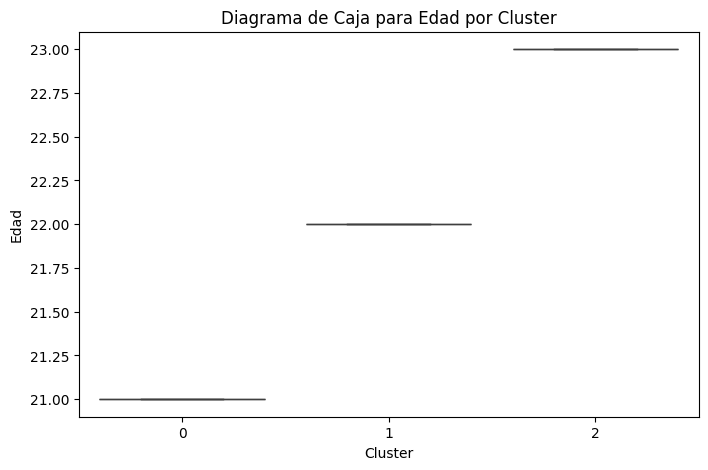

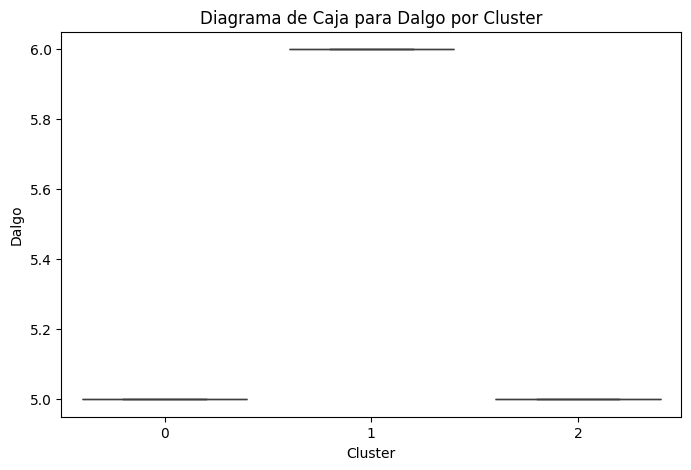

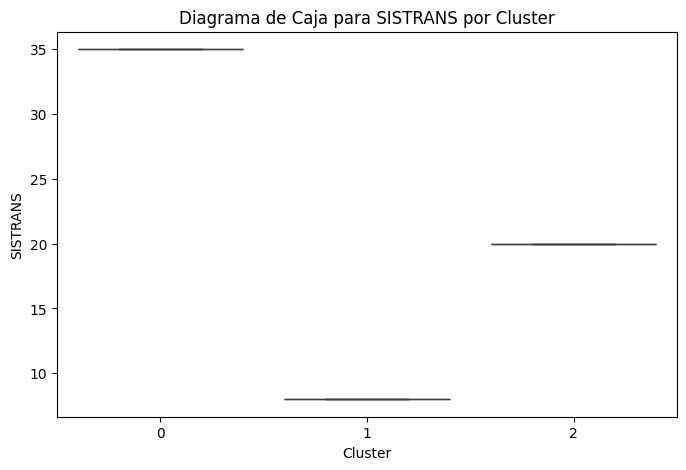

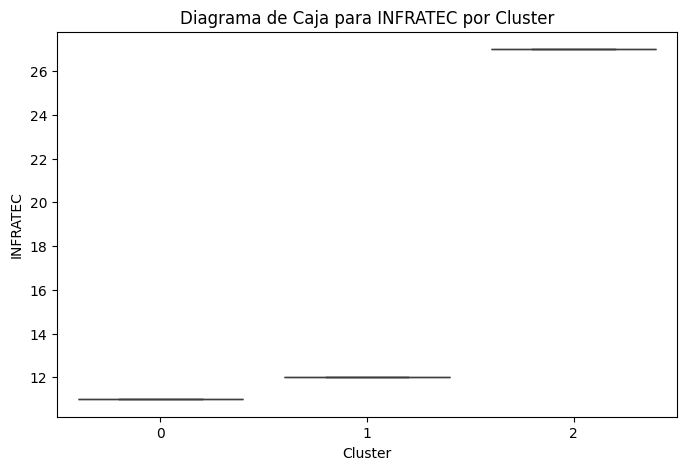

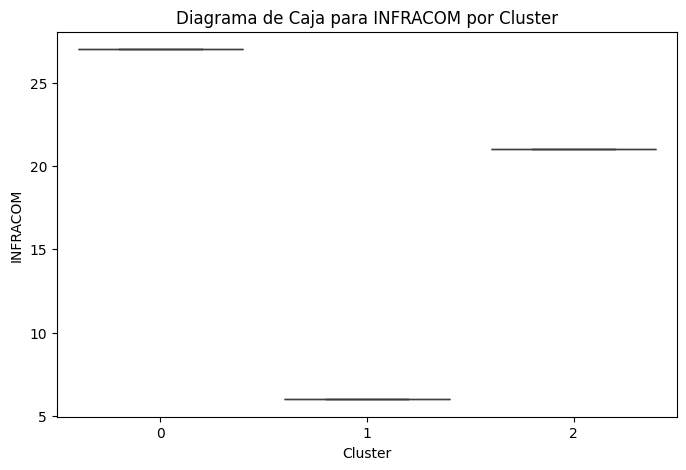

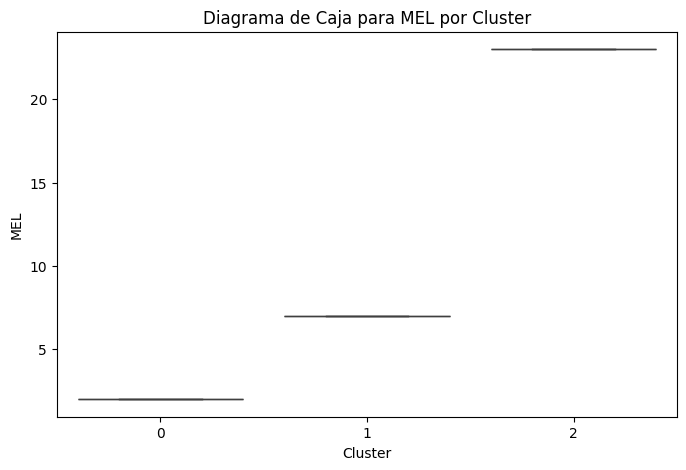

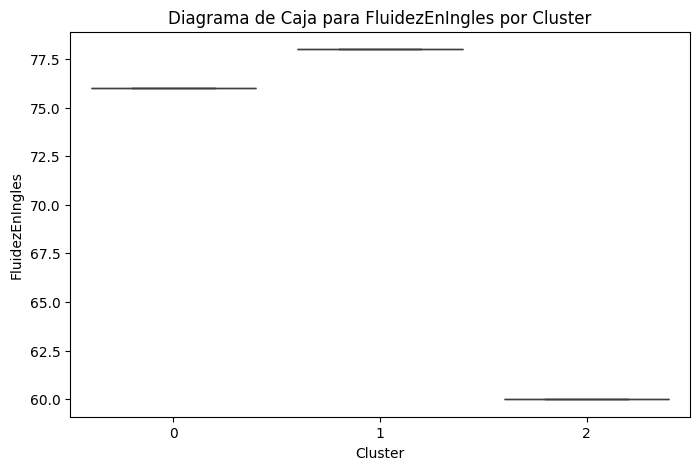

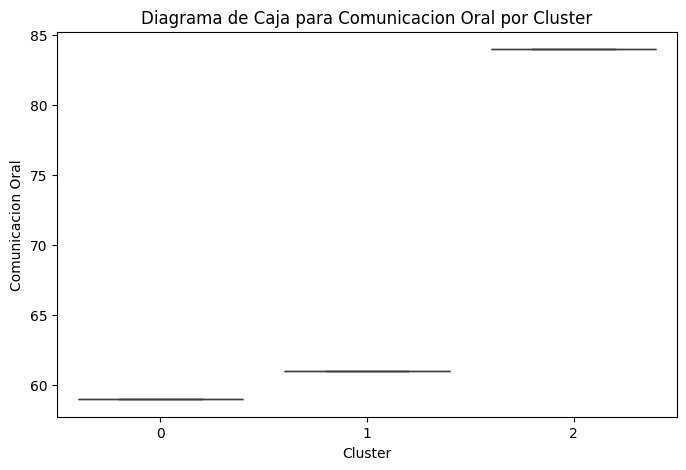

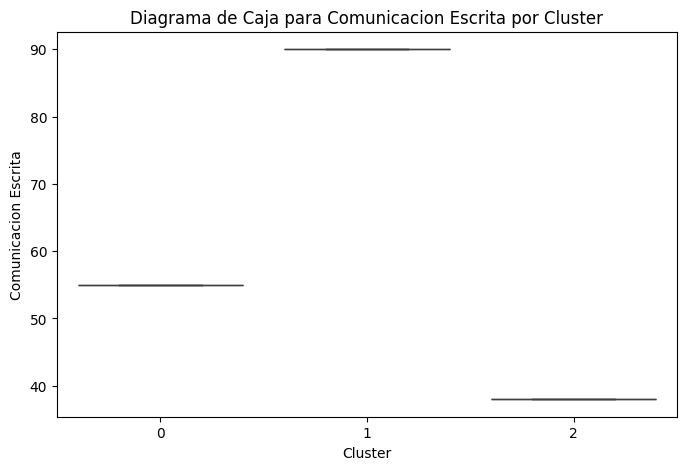

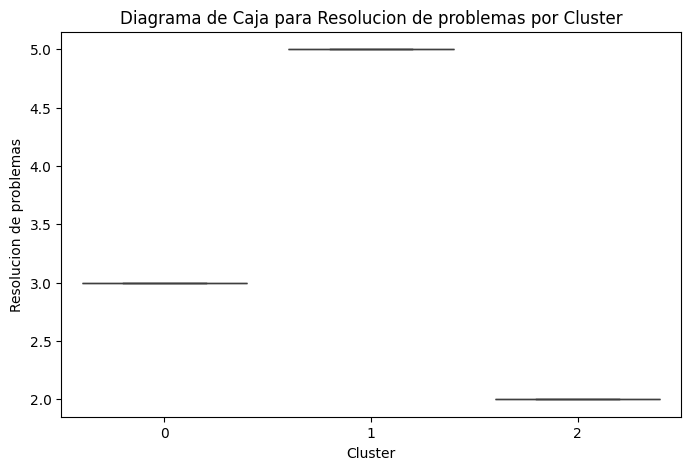

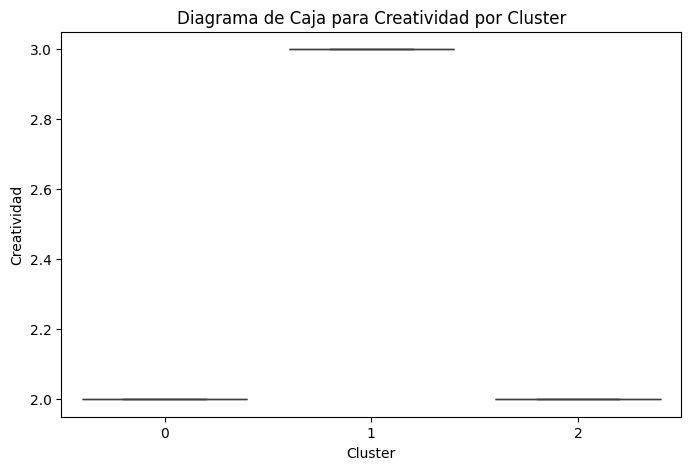

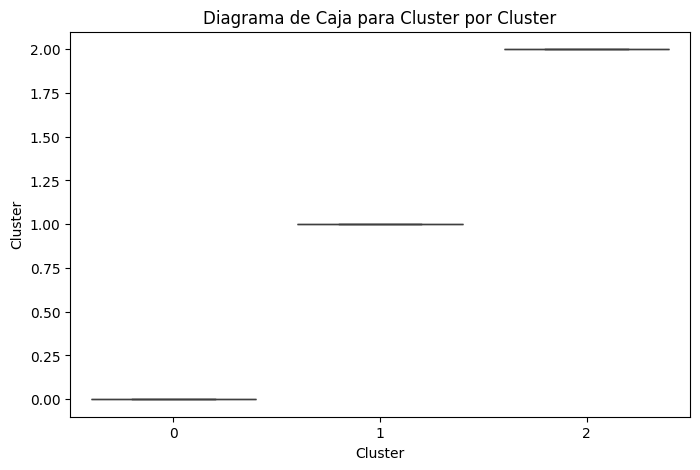

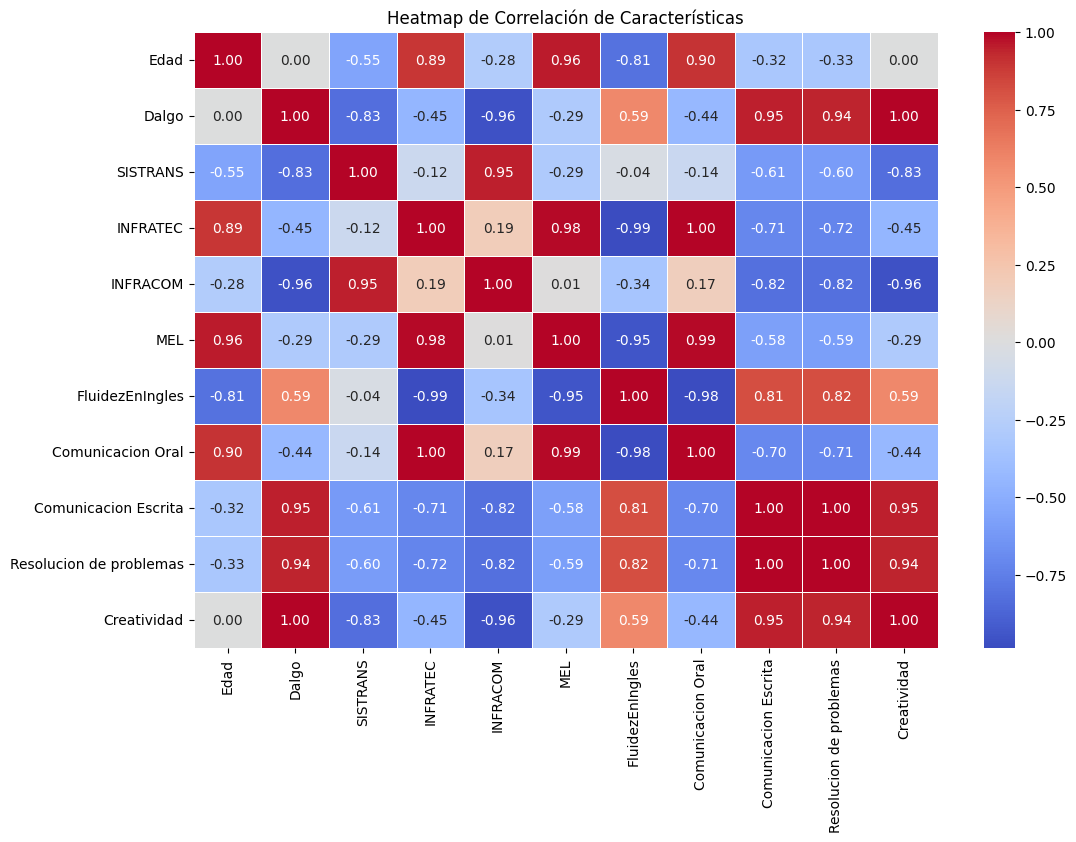

In [39]:
# Selección de características relevantes
features = dfCopy[
    [
        "Edad",
        "Dalgo",
        "SISTRANS",
        "INFRATEC",
        "INFRACOM",
        "MEL",
        "FluidezEnIngles",
        "Comunicacion Oral",
        "Comunicacion Escrita",
        "Resolucion de problemas",
        "Creatividad",
    ]
]

# Normalización de datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicación del algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
dfCopy["Cluster"] = kmeans.fit_predict(features_scaled)

# Análisis de resultados
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_means = pd.DataFrame(cluster_centers, columns=features.columns)

# Visualización de resultados
for cluster in range(3):
    cluster_data = dfCopy[dfCopy["Cluster"] == cluster]
    print(f"\nCluster {cluster + 1}:")
    print(cluster_means.iloc[cluster])
    print(f"Número de estudiantes en el cluster: {len(cluster_data)}")

import seaborn as sns

# Suponiendo que 'data' es tu conjunto de datos y 'labels' son las asignaciones de clusters
for feature in dfCopy.columns[2:]:  # Excluyendo 'IdEstudiante' y 'Genero'
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Cluster", y=feature, data=dfCopy)
    plt.title(f"Diagrama de Caja para {feature} por Cluster")
    plt.show()

features_sym = dfCopy.drop(["Cluster", "Genero", "IdEstudiante"], axis=1)

# Calcula la matriz de correlación
correlation_matrix = features_sym.corr()

# Crea el heatmap utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación de Características")
plt.show()

### Conclusiones
Podemos ver que los factores que mas determinan si se admiten o no mascotas son el tamaño
y cantidad de habutaciones en la vivienda. pues entre mas grande sea va a ser mas facik que se
tengan gatos y perros. Tambien es determinannte la ubucaion de la vivienda. pues hay estados
donde es mas comun encontrar mascotas como por ejemplo texas y wisconsin